In [48]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from photutils.aperture import aperture_photometry, CircularAperture, CircularAnnulus
from astropy.wcs import WCS
from astropy.io import fits
from astropy.coordinates import SkyCoord
import sep
from matplotlib.patches import Ellipse

In [2]:
im_test='./WCS_Solved/NGC3705/NGC3705_R.fits'
image=fits.open(im_test)[0].data
hdr=fits.open(im_test)[0].header
wcs=WCS(hdr)
print(wcs)

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 172.51029444  9.36072906725  
CRPIX : 770.781943321  395.987697601  
CD1_1 CD1_2  : -0.000174355101095  2.2113550891e-06  
CD2_1 CD2_2  : -2.14463484616e-06  -0.000174214452194  
NAXIS : 2048  2054


(0.0, 2048.0)

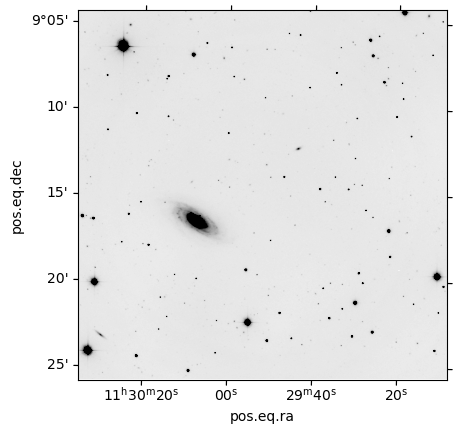

In [5]:
fig=plt.figure()
ax=fig.add_subplot(111,projection=wcs)
plt.imshow(image,vmin=400,vmax=800,cmap='Greys')
#plt.scatter(references[0],references[2],transform=ax.get_transform('world'),marker='+',alpha=0.3)
#plt.scatter([172.47],[9.25],transform=ax.get_transform('world'))
plt.ylim(0, image.shape[0])
plt.xlim(0, image.shape[1])

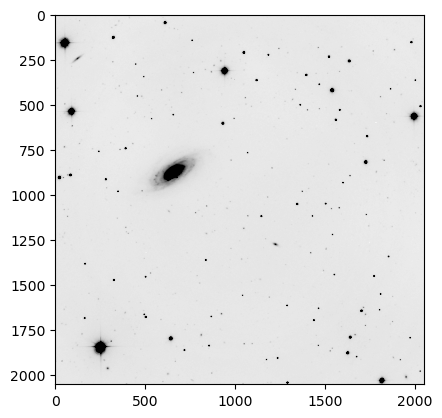

In [45]:
plt.imshow(image,vmin=400,vmax=800,cmap='Greys')

(600.0, 1100.0)

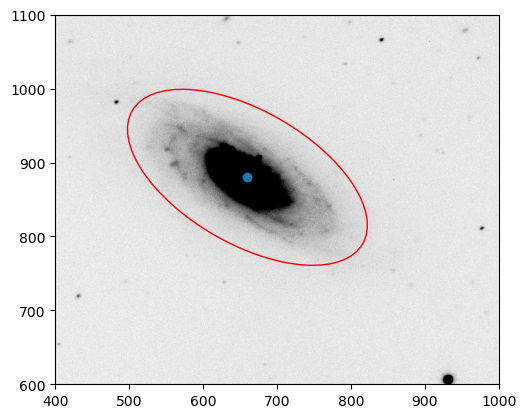

In [133]:
fig, ax = plt.subplots()
ax.imshow(image,vmin=400,vmax=800,cmap='Greys')
mask = np.zeros(data.shape, dtype=bool)
sep.mask_ellipse(mask, 650, 870, 40, 80,
                 0.3*np.pi, r=6.)
e = Ellipse(xy=(660, 880),
                width=6*30,
                height=6*60,
                angle=60)
e.set_facecolor('none')
e.set_edgecolor('red')
ax.add_artist(e)
ax.scatter([660],[880])
plt.xlim(400,1000)
plt.ylim(600,1100)


In [17]:
data=image.byteswap().newbyteorder()
#No idea why this needs to be done but sep doesnt like the byte order
print(type(data[0][0]))

<class 'numpy.float64'>


In [157]:
bkg = sep.Background(data)
print(bkg.globalback)
print(bkg.globalrms)

470.56536865234375
9.467061996459961


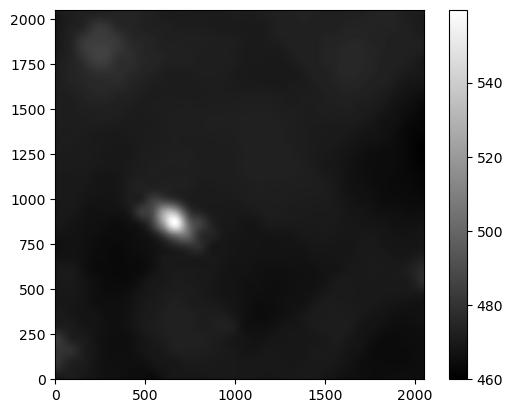

In [163]:
bkg_image = bkg.back()
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
data_sub=data-bkg.globalback
#Clearly incorrect but going to run with it for source extraction

In [164]:
objects = sep.extract(data_sub, 5, err=bkg.globalrms)
len(objects)
obj=np.argmax(objects['npix'])
#print(np.argmax(objects['npix']))
print(objects[obj])


(47.33531189, 17091, 16634, 521, 715, 821, 984, 658.76404757, 877.25866404, 1905.21119133, 1045.08848901, -849.97885577, 0.00037352, 0.00019991, -0.00017376, 49.27204132, 22.85969353, -0.55119324, 0.00082378, 0.00150176, 0.00133997, 4284483., 4287015., 7636.44091797, 8230.10546875, 659, 878, 659, 878, 1)


(600.0, 1100.0)

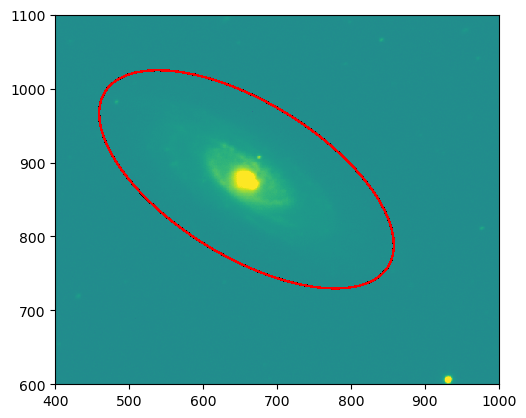

In [165]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='viridis',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][obj], objects['y'][obj]),
                width=2.5*kronrad*objects['a'][obj],
                height=2.5*kronrad*objects['b'][obj],
                angle=objects['theta'][obj] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
plt.xlim(400,1000)
plt.ylim(600,1100)

In [166]:
kronrad, krflag = sep.kron_radius(data, [objects['x'][obj]], [objects['y'][obj]], [objects['a'][obj]], [objects['b'][obj]], [objects['theta'][obj]], 6.0)
flux, fluxerr, flag = sep.sum_ellipse(data, [objects['x'][obj]], [objects['y'][obj]], [objects['a'][obj]], [objects['b'][obj]], [objects['theta'][obj]], 2.5*kronrad,
                                      subpix=1,bkgann=(3.5*kronrad,4*kronrad))
flag |= krflag  # combine flags into 'flag'


In [167]:
print(flux)

[9644589.04415172]


: 